## Data cleaning 

In [410]:
import pandas as pd
import numpy as np
import os as os
import matplotlib.pyplot as plt
import seaborn as sns

In [355]:
os.getcwd()

'/Users/andrealongoni/Desktop/USIINFMScThesis'

In [403]:
dataWine = pd.read_csv('FineWine.csv')

In [404]:
dataWine.info

<bound method DataFrame.info of      Unnamed: 0     X.1       X    country  \
0          9005    1576    1575     France   
1          9006    1572    1571     France   
2          9007  113582  113581     France   
3          9008    1567    1566     France   
4          9009   89479   89478    Austria   
5          9010   36532   36531   Portugal   
6          9011   69517   69516     France   
7          9012   41442   41441   Portugal   
8          9013   84821   84820     France   
9          9014   54299   54298     France   
10         9015   88871   88870      Italy   
11         9016   30111   30110     France   
12         9017   56954   56953  Australia   
13         9018   77029   77028  Australia   
14         9019  124431  124430     France   
15         9020  122936  122935     France   
16         9021   56960   56959  Australia   
17         9022   36530   36529     France   
18         9023   39289   39288     France   
19         9024   97151   97150     France   
20

## Linear Regression

### Single Linear regression

In [373]:
df = dataWine 
#take only necessary columns 
cdf = df[['price', 'country', 'points', 'province', 'variety', 'vintage', 'sentiment_dictionary','description']]
#clean from NAs, inf, space
cdf = cdf.replace([np.inf, -np.inf, ' '], np.nan).dropna()

In [374]:
msk = np.random.rand(len(cdf)) < 0.8
train = cdf[msk]
test = cdf[~msk]

In [375]:
#train[train.price == ' '] = np.nan

In [377]:
#import Linear regression tool
from sklearn import linear_model
regr = linear_model.LinearRegression()
#assign dep and indep variables 
train_x = np.asanyarray(train[['sentiment_dictionary']])
train_y = np.asanyarray(train[['price']])
#fit the regression 
regr.fit (train_x, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [378]:
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[1038.90496258]]
Intercept:  [-301.50219693]


In [380]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['price']])
test_y = np.asanyarray(test[['sentiment_dictionary']])
test_y_hat = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_hat , test_y) )

Mean absolute error: 519133.98
Residual sum of squares (MSE): 306332711254.90
R2-score: -7.32


### MultiLinear regression

In [381]:
#assign dep and indep variables 
train_x = np.asanyarray(train[['points', 'sentiment_dictionary']])
train_y = np.asanyarray(train[['price']])
#fit the regression 
regr.fit (train_x, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [382]:
# The coefficients
print ('Coefficients: ', regr.coef_)

Coefficients:  [[  -1.82151462 1046.3634186 ]]


In [385]:
y_hat= regr.predict(test[['points', 'sentiment_dictionary']])
x = np.asanyarray(test[['points', 'sentiment_dictionary']])
y = np.asanyarray(test[['price']])

In [386]:
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))
print("R2-score: %.2f" % r2_score(y_hat , y) )

Variance score: 0.75
R2-score: 0.64


### price - points scatterplot

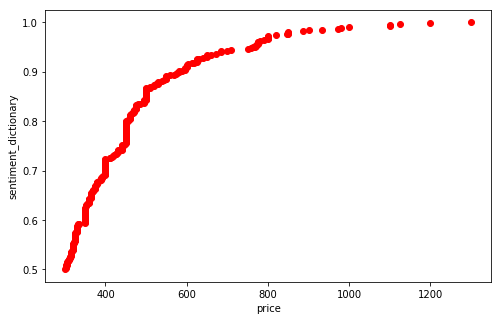

In [390]:
plt.figure(figsize=(8,5))
x_data, y_data = (cdf["price"].values, cdf["sentiment_dictionary"].values)
plt.plot(x_data, y_data, 'ro')
plt.ylabel('sentiment_dictionary')
plt.xlabel('price')
plt.show()

### Logit regression

In [396]:
cdf['price'] = cdf['price'].astype('float')
cdf['sentiment_dictionary'] = cdf['sentiment_dictionary'].astype('float')

In [397]:
def sigmoid(x, Beta_1, Beta_2):
    y = 1 / (1 + np.exp(-Beta_1 * (x - Beta_2)))
    return y

In [398]:
# Lets normalize our data
xdata =x_data/max(x_data)
ydata =y_data/max(y_data)

In [399]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(sigmoid, xdata, ydata)

In [400]:
#print the final parameters
print(" beta_1 = %f, beta_2 = %f" % (popt[0], popt[1]))

 beta_1 = 10.550376, beta_2 = 0.225928


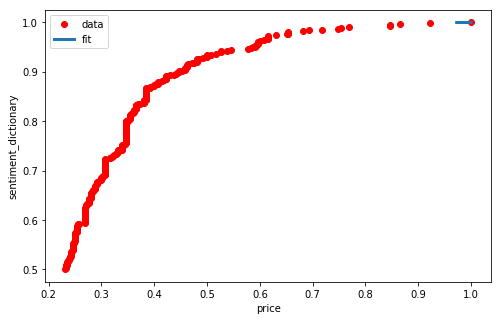

In [401]:
x = np.linspace(1960, 2015, 55)
x = x/max(x)
plt.figure(figsize=(8,5))
y = sigmoid(x, *popt)
plt.plot(xdata, ydata, 'ro', label='data')
plt.plot(x,y, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('sentiment_dictionary')
plt.xlabel('price')
plt.show()

In [402]:
#accuracy
msk = np.random.rand(len(cdf)) < 0.8
train_x = xdata[msk]
test_x = xdata[~msk]
train_y = ydata[msk]
test_y = ydata[~msk]

# build the model using train set
popt, pcov = curve_fit(sigmoid, train_x, train_y)

# predict using test set
y_hat = sigmoid(test_x, *popt)

# evaluation
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat - test_y) ** 2))
from sklearn.metrics import r2_score
print("R2-score: %.2f" % r2_score(y_hat , test_y) )

Mean absolute error: 0.01
Residual sum of squares (MSE): 0.00
R2-score: 0.99


In [288]:
#save csv 
cdf.to_csv('Triout.csv')

In [428]:
dataWine.dtypes

country                   object
description               object
designation               object
points                     int64
price                      int64
province                  object
region_1                  object
region_2                  object
taster_name               object
taster_twitter_handle     object
title                     object
variety                   object
winery                    object
vintage                    int64
sentiment                float64
thin                       int64
hollow                     int64
mellow                     int64
short                      int64
austere                    int64
angular                    int64
delicate                   int64
elegant                    int64
light bodied               int64
finesse                    int64
closed                     int64
polished                   int64
complex                    int64
full bodied                int64
full-bodied                int64
          

## Supervised ML

In [430]:
dataWine = pd.read_csv('TreeClassification.csv')
dataWine = dataWine[['price', 'points', 'province','variety', 'vintage']]

In [431]:
dataWine.head()
df = dataWine

In [432]:
from sklearn.preprocessing import OneHotEncoder

In [433]:
from sklearn.model_selection import train_test_split
df = df.dropna()
X = df.drop(columns='price')
y = df['price'].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [434]:
ohe = OneHotEncoder(sparse=False)
X_train_ohe = ohe.fit_transform(X_train)

In [437]:
class MultiColumnLabelEncoder:
    
    def __init__(self, columns = None):
        self.columns = columns # list of column to encode
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        
        output = X.copy()
        
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname, col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        
        return output
    def fit_transform(self, X, y=None):
        return self.fit(X, y).transform(X)

In [438]:
le = MultiColumnLabelEncoder()
X_train_le = le.fit_transform(X_train)
X_train_le.head()

,points,province,variety,vintage
11078,8,98,117,49
17033,11,24,117,48
10404,8,24,117,48
16944,13,24,117,45
6196,11,114,128,47


In [439]:
X_train_ohe = ohe.fit_transform(X_train_le)
X_train_ohe

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [1]:
import category_encoders as ce

ModuleNotFoundError: No module named 'category_encoders'

## Unsupervised ML